In [70]:
import pandas as pd

df = pd.read_csv("mobile_game_inapp_purchases.csv")


In [71]:
print(df.shape)


(3024, 13)


In [72]:
print(df.dtypes)

UserID                            object
Age                              float64
Gender                            object
Country                           object
Device                            object
GameGenre                         object
SessionCount                       int64
AverageSessionLength             float64
SpendingSegment                   object
InAppPurchaseAmount              float64
FirstPurchaseDaysAfterInstall    float64
PaymentMethod                     object
LastPurchaseDate                  object
dtype: object


In [73]:

print(df.head(3))

                                 UserID   Age Gender      Country   Device  \
0  c9889ab0-9cfc-4a75-acd9-5eab1df0015c  49.0   Male       Norway  Android   
1  7c9e413c-ecca-45f2-a780-2826a07952a2  15.0   Male  Switzerland      iOS   
2  fd61e419-1a92-4f43-a8c7-135842ad328a  23.0   Male        China  Android   

       GameGenre  SessionCount  AverageSessionLength SpendingSegment  \
0  Battle Royale             9                 12.83          Minnow   
1     Action RPG            11                 19.39          Minnow   
2       Fighting             9                  8.87          Minnow   

   InAppPurchaseAmount  FirstPurchaseDaysAfterInstall PaymentMethod  \
0                11.40                           28.0     Apple Pay   
1                 6.37                           18.0    Debit Card   
2                15.81                           30.0     Apple Pay   

  LastPurchaseDate  
0       2025-03-19  
1       2025-06-08  
2       2025-06-02  


In [74]:
#Checked all user ID is unique
df['UserID'].nunique() == len(df)  # Should be True

True

In [75]:
#finding missing values in age
df['Age'].fillna(df['Age'].mean())
df = df[(df['Age'] > 0) & (df['Age'] < 100)]


In [76]:
#gender typos or null values
df['Gender'] = df['Gender'].str.title()
df['Gender'].fillna('Unknown')

0         Male
1         Male
2         Male
3         Male
4       Female
         ...  
3019    Female
3020      Male
3021      Male
3022      Male
3023      Male
Name: Gender, Length: 2964, dtype: object

In [77]:
#Check for unknown gender
df['Gender'].value_counts()
# or filter rows
df[df['Gender'] == 'Unknown']


,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate


In [78]:
#ensuring session count is always >=0
df = df[df['SessionCount'] >= 0]


In [79]:
#check for null values in average session length
df.loc[df['AverageSessionLength'] <= 0, 'AverageSessionLength'] = df['AverageSessionLength'].mean()


In [80]:
#in app purchase negative and missing values should be considered as 0
df['InAppPurchaseAmount'].fillna(0)


0       11.40
1        6.37
2       15.81
3       13.49
4       10.86
        ...  
3019    12.48
3020    14.77
3021    16.69
3022    17.29
3023     4.11
Name: InAppPurchaseAmount, Length: 2964, dtype: float64

In [81]:
#check for null values in first purchase after install
df['FirstPurchaseDaysAfterInstall'].fillna(df['FirstPurchaseDaysAfterInstall'].mean())
df = df[df['FirstPurchaseDaysAfterInstall'] >= 0]


In [82]:
#Fill missing payment values as nan
df['PaymentMethod'] = df['PaymentMethod'].str.title()
df['PaymentMethod'].fillna('Unknown',)

0             Apple Pay
1            Debit Card
2             Apple Pay
3            Debit Card
4                Paypal
             ...       
3019         Google Pay
3020    Carrier Billing
3021          Gift Card
3022             Paypal
3023    Carrier Billing
Name: PaymentMethod, Length: 2835, dtype: object

In [83]:
#find unknown payment methods
df['PaymentMethod'].value_counts()
# or filter rows
df[df['PaymentMethod'] == 'Unknown']


,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate


In [84]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05


In [85]:
#Checked for missing values in my dataset
df.isnull().sum()

UserID                            0
Age                               0
Gender                           59
Country                          59
Device                           55
GameGenre                        56
SessionCount                      0
AverageSessionLength              0
SpendingSegment                   0
InAppPurchaseAmount               0
FirstPurchaseDaysAfterInstall     0
PaymentMethod                     0
LastPurchaseDate                  0
dtype: int64

In [86]:
#total no of rows
total_rows = len(df)
print(total_rows)

2835


In [87]:
#replace null values with unknown
df['Country'] = df['Country'].fillna('Unknown')
df['Device'] = df['Device'].fillna('Unknown')
df['GameGenre'] = df['GameGenre'].fillna('Unknown')


In [88]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         2835 non-null   object 
 1   Age                            2835 non-null   float64
 2   Gender                         2776 non-null   object 
 3   Country                        2835 non-null   object 
 4   Device                         2835 non-null   object 
 5   GameGenre                      2835 non-null   object 
 6   SessionCount                   2835 non-null   int64  
 7   AverageSessionLength           2835 non-null   float64
 8   SpendingSegment                2835 non-null   object 
 9   InAppPurchaseAmount            2835 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64
 11  PaymentMethod                  2835 non-null   object 
 12  LastPurchaseDate               2835 non-null   object

In [90]:
#changed the in app purchase values to *100
df['InAppPurchaseAmount'] = df['InAppPurchaseAmount'] * 100  # scale up 100x


In [91]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,1140.0,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,637.0,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,1581.0,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,1349.0,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,1086.0,15.0,Paypal,2025-05-05


In [92]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,1140.0,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,637.0,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,1581.0,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,1349.0,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,1086.0,15.0,Paypal,2025-05-05


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         2835 non-null   object 
 1   Age                            2835 non-null   float64
 2   Gender                         2776 non-null   object 
 3   Country                        2835 non-null   object 
 4   Device                         2835 non-null   object 
 5   GameGenre                      2835 non-null   object 
 6   SessionCount                   2835 non-null   int64  
 7   AverageSessionLength           2835 non-null   float64
 8   SpendingSegment                2835 non-null   object 
 9   InAppPurchaseAmount            2835 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64
 11  PaymentMethod                  2835 non-null   object 
 12  LastPurchaseDate               2835 non-null   object

In [94]:
# Keep as datetime64[ns] but remove time
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate']).dt.normalize()


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   float64       
 2   Gender                         2776 non-null   object        
 3   Country                        2835 non-null   object        
 4   Device                         2835 non-null   object        
 5   GameGenre                      2835 non-null   object        
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   object        
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

In [96]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,1140.0,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,637.0,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,1581.0,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,1349.0,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,1086.0,15.0,Paypal,2025-05-05


In [97]:
#changing age to int and rounding up decimals to 2 digits
df['Age'] = df['Age'].astype(int)
df['AverageSessionLength'] = df['AverageSessionLength'].round(2)
df['InAppPurchaseAmount'] = df['InAppPurchaseAmount'].round(2)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   int64         
 2   Gender                         2776 non-null   object        
 3   Country                        2835 non-null   object        
 4   Device                         2835 non-null   object        
 5   GameGenre                      2835 non-null   object        
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   object        
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

In [99]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49,Male,Norway,Android,Battle Royale,9,12.83,Minnow,1140.0,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,637.0,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23,Male,China,Android,Fighting,9,8.87,Minnow,1581.0,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31,Male,Mexico,Android,Racing,12,19.56,Minnow,1349.0,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37,Female,India,Android,Battle Royale,10,15.23,Minnow,1086.0,15.0,Paypal,2025-05-05


In [100]:
#adding engagement score
df['EngagementScore'] = df['SessionCount'] * df['AverageSessionLength']


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   int64         
 2   Gender                         2776 non-null   object        
 3   Country                        2835 non-null   object        
 4   Device                         2835 non-null   object        
 5   GameGenre                      2835 non-null   object        
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   object        
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

In [102]:
#deviding age group into different bins
bins = [0, 17, 24, 34, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   int64         
 2   Gender                         2776 non-null   object        
 3   Country                        2835 non-null   object        
 4   Device                         2835 non-null   object        
 5   GameGenre                      2835 non-null   object        
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   object        
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

In [104]:
#all distinct values of each columns
columns = ['Gender', 'Country', 'Device', 'GameGenre', 'SpendingSegment', 'PaymentMethod']

for col in columns:
    print(f"{col}: {df[col].unique()}\n")


Gender: ['Male' 'Female' 'Other' nan]

Country: ['Norway' 'Switzerland' 'China' 'Mexico' 'India' 'Italy' 'Denmark' 'Japan'
 'Russia' 'Australia' 'Turkey' 'South Korea' 'Saudi Arabia' 'Sri Lanka'
 'Sweden' 'Canada' 'France' 'Unknown' 'UK' 'Netherlands' 'Spain' 'Brazil'
 'USA' 'Bangladesh' 'Afghanistan' 'Egypt' 'Germany' 'Iran']

Device: ['Android' 'iOS' 'Unknown']

GameGenre: ['Battle Royale' 'Action RPG' 'Fighting' 'Racing' 'Simulation' 'Unknown'
 'MMORPG' 'Role Playing' 'Sports' 'Card' 'Sandbox' 'Puzzle' 'Strategy'
 'Casual' 'Adventure' 'MOBA']

SpendingSegment: ['Minnow' 'Dolphin' 'Whale']

PaymentMethod: ['Apple Pay' 'Debit Card' 'Paypal' 'Google Pay' 'Gift Card'
 'Carrier Billing' 'Credit Card']



In [105]:
#changing the type to category
df['Gender'] = df['Gender'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Device'] = df['Device'].astype('category')
df['GameGenre'] = df['GameGenre'].astype('category')
df['SpendingSegment'] = df['SpendingSegment'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   int64         
 2   Gender                         2776 non-null   category      
 3   Country                        2835 non-null   category      
 4   Device                         2835 non-null   category      
 5   GameGenre                      2835 non-null   category      
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   category      
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

How does user engagement evolve over time?

Goal: See if users are becoming more or less active.

Metric: SessionCount, AverageSessionLength, EngagementScore over time (by week/month based on LastPurchaseDate).

Stakeholder value: Identify periods of high/low engagement, plan retention campaigns.

In [107]:
# Ensure LastPurchaseDate is datetime
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'])

# Aggregate EngagementScore by month
df_monthly = df.groupby(df['LastPurchaseDate'].dt.to_period('M'))['EngagementScore'].mean().reset_index()
df_monthly['LastPurchaseDate'] = df_monthly['LastPurchaseDate'].dt.to_timestamp()


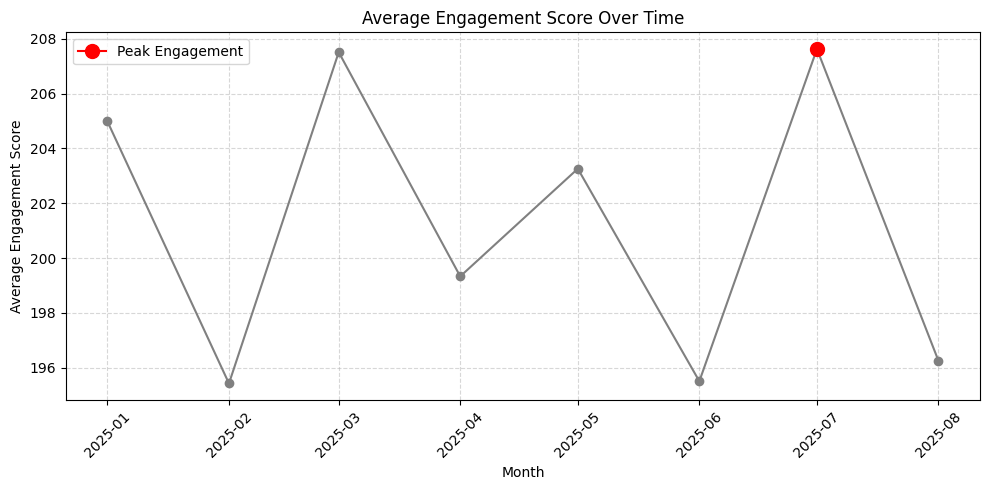

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_monthly['LastPurchaseDate'], df_monthly['EngagementScore'], color='gray', marker='o')

# Highlight the month with maximum engagement
max_idx = df_monthly['EngagementScore'].idxmax()
plt.plot(df_monthly['LastPurchaseDate'][max_idx], df_monthly['EngagementScore'][max_idx], 
         color='red', marker='o', markersize=10, label='Peak Engagement')

plt.title('Average Engagement Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [109]:
# Aggregate EngagementScore by week
df_weekly = df.groupby(df['LastPurchaseDate'].dt.to_period('W'))['EngagementScore'].mean().reset_index()

# Convert period to timestamp for plotting
df_weekly['LastPurchaseDate'] = df_weekly['LastPurchaseDate'].dt.start_time


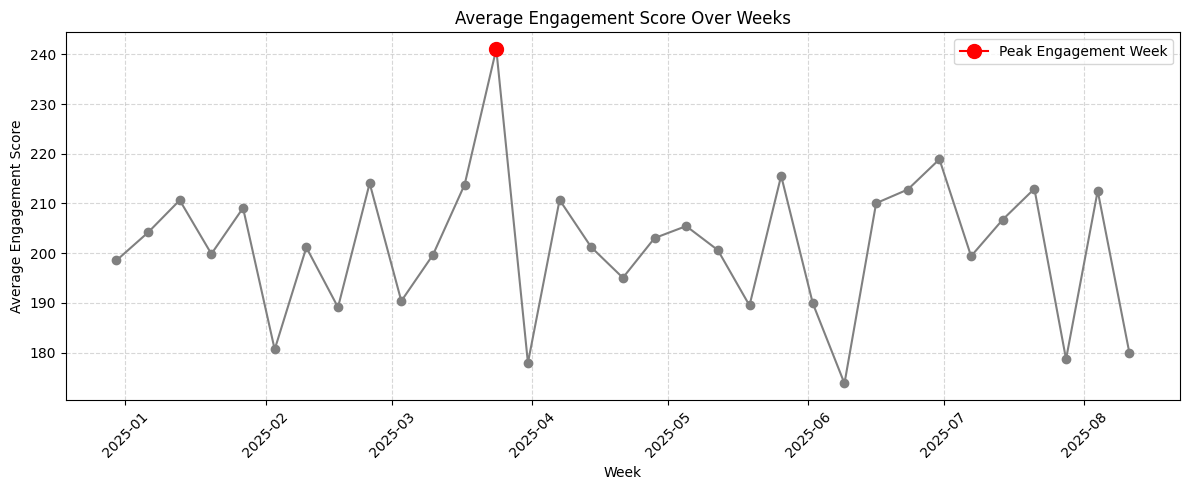

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_weekly['LastPurchaseDate'], df_weekly['EngagementScore'], color='gray', marker='o')

# Highlight the week with maximum engagement
max_idx = df_weekly['EngagementScore'].idxmax()
plt.plot(df_weekly['LastPurchaseDate'][max_idx], df_weekly['EngagementScore'][max_idx], 
         color='red', marker='o', markersize=10, label='Peak Engagement Week')

plt.title('Average Engagement Score Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Observations: 

User engagement has remained relatively stable month-to-month, fluctuating between scores of ~195 and ~208, with July 2025 showing the highest monthly average (~208). February 2025 recorded the lowest (~195), prompting a need to investigate potential causes such as reduced content or external factors. Weekly data reveals more volatility, with engagement scores ranging from ~180 to ~220 and a sharp peak of ~240 during the week of March 2025. This spike suggests a highly successful event or update that significantly boosted user activity.

While the March weekly peak and July monthly high are not directly adjacent, they may be connected through broader patterns—such as seasonal user behavior, campaign cycles, or retention effects. The March spike could have introduced or reactivated users who remained engaged through July, or both peaks may reflect strategic content releases aligned with marketing efforts. Further analysis of user cohorts, session data, and campaign timelines could help confirm these links and guide future engagement strategies.


In [111]:
#creating a month column
df['Month'] = df['LastPurchaseDate'].dt.strftime('%Y-%m')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 3023
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         2835 non-null   object        
 1   Age                            2835 non-null   int64         
 2   Gender                         2776 non-null   category      
 3   Country                        2835 non-null   category      
 4   Device                         2835 non-null   category      
 5   GameGenre                      2835 non-null   category      
 6   SessionCount                   2835 non-null   int64         
 7   AverageSessionLength           2835 non-null   float64       
 8   SpendingSegment                2835 non-null   category      
 9   InAppPurchaseAmount            2835 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  2835 non-null   float64       
 11  PaymentMethod         

In [113]:
#focus on the extremes: the peak and the low. It’s a fast way to spot what changed.
df_july = df[df['Month'] == '2025-07']
df_february = df[df['Month'] == '2025-02']


Comparing user profile across Peak vs Low


In [114]:
# Compare GameGenre distribution
print("GameGenre - July")
print(df_july['GameGenre'].value_counts(normalize=True))

print("\nGameGenre - February")
print(df_february['GameGenre'].value_counts(normalize=True))


GameGenre - July
GameGenre
Card             0.092457
Simulation       0.085158
Puzzle           0.077859
MMORPG           0.072993
Battle Royale    0.068127
Sports           0.065693
Sandbox          0.065693
MOBA             0.065693
Role Playing     0.063260
Racing           0.063260
Action RPG       0.060827
Casual           0.060827
Strategy         0.053528
Adventure        0.043796
Fighting         0.041363
Unknown          0.019465
Name: proportion, dtype: float64

GameGenre - February
GameGenre
Sandbox          0.100890
Puzzle           0.077151
Strategy         0.077151
Card             0.074184
Simulation       0.068249
Adventure        0.065282
Sports           0.065282
Battle Royale    0.062315
Casual           0.062315
Racing           0.062315
Action RPG       0.059347
MMORPG           0.053412
Role Playing     0.050445
MOBA             0.047478
Fighting         0.038576
Unknown          0.035608
Name: proportion, dtype: float64


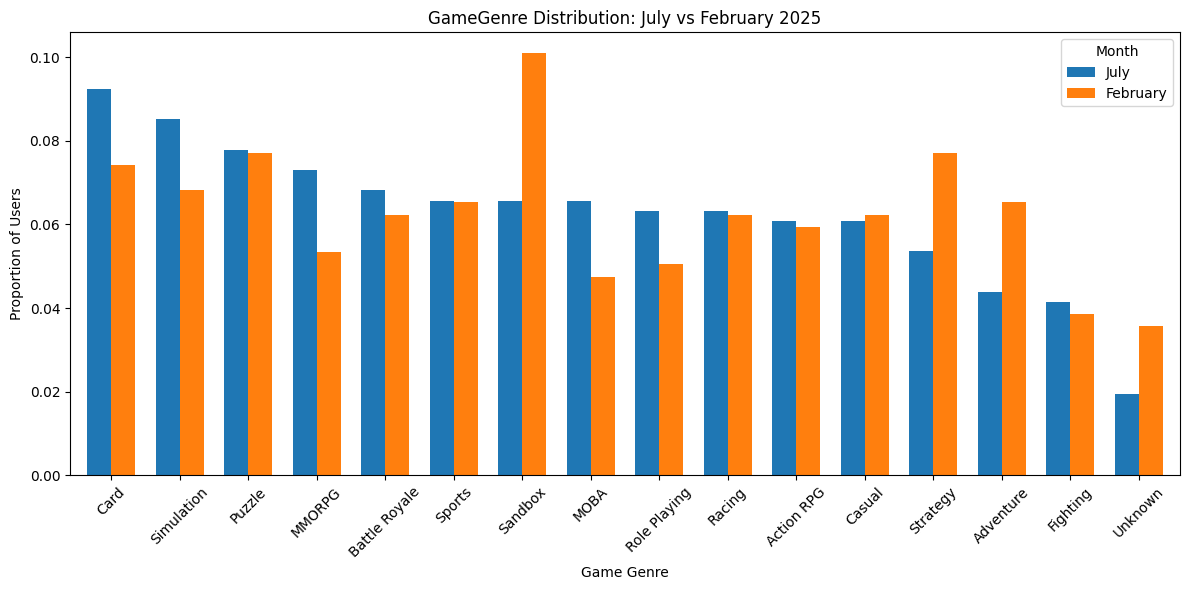

In [115]:
#GameGenre distribution for July and February
import matplotlib.pyplot as plt
import pandas as pd

# Get normalized value counts
july_genres = df_july['GameGenre'].value_counts(normalize=True)
feb_genres = df_february['GameGenre'].value_counts(normalize=True)

# Combine into a single DataFrame
genre_df = pd.DataFrame({
    'July': july_genres,
    'February': feb_genres
}).fillna(0)  # Fill missing genres with 0

# Sort by July for better visual order
genre_df = genre_df.sort_values(by='July', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('GameGenre Distribution: July vs February 2025')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [116]:
# Compare Device distribution
print("Device - July")
print(df_july['Device'].value_counts(normalize=True))

print("\nDevice - February")
print(df_february['Device'].value_counts(normalize=True))

Device - July
Device
Android    0.513382
iOS        0.464720
Unknown    0.021898
Name: proportion, dtype: float64

Device - February
Device
Android    0.563798
iOS        0.415430
Unknown    0.020772
Name: proportion, dtype: float64


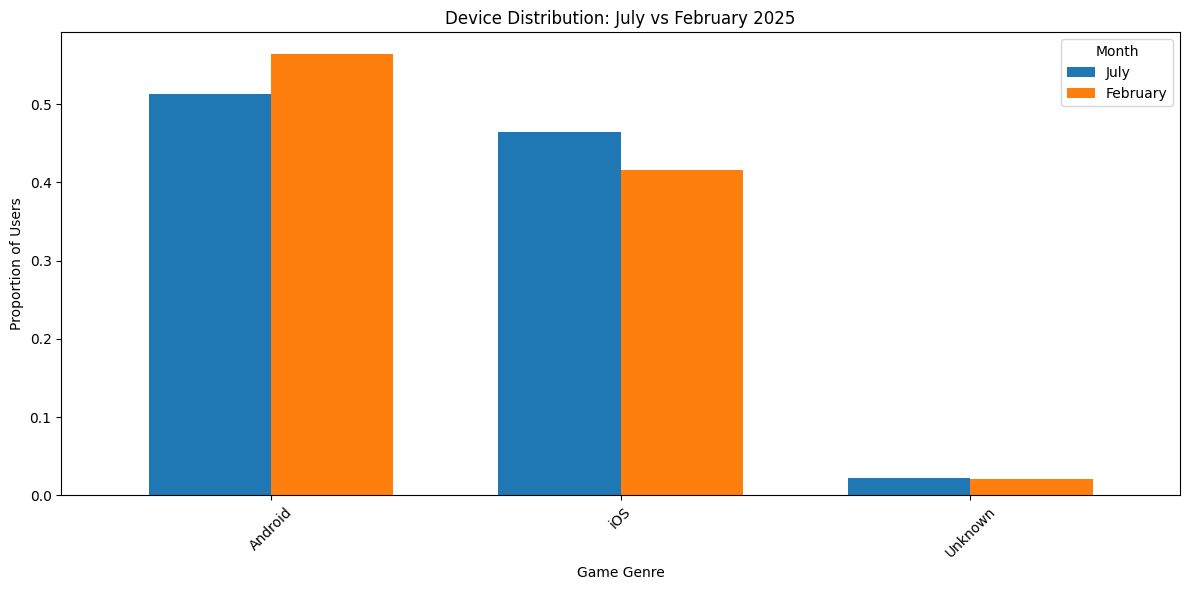

In [117]:
#Device distribution for July and February
import matplotlib.pyplot as plt
import pandas as pd

# Get normalized value counts
july_genres = df_july['Device'].value_counts(normalize=True)
feb_genres = df_february['Device'].value_counts(normalize=True)

# Combine into a single DataFrame
genre_df = pd.DataFrame({
    'July': july_genres,
    'February': feb_genres
}).fillna(0)  # Fill missing genres with 0

# Sort by July for better visual order
genre_df = genre_df.sort_values(by='July', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('Device Distribution: July vs February 2025')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [118]:
# Compare AgeGroup distribution
print("AgeGroup - July")
print(df_july['AgeGroup'].value_counts(normalize=True))

print("\nAgeGroup - February")
print(df_february['AgeGroup'].value_counts(normalize=True))

AgeGroup - July
AgeGroup
Senior         0.476886
Adult          0.231144
Young Adult    0.177616
Teen           0.114355
Name: proportion, dtype: float64

AgeGroup - February
AgeGroup
Senior         0.498516
Adult          0.237389
Young Adult    0.157270
Teen           0.106825
Name: proportion, dtype: float64


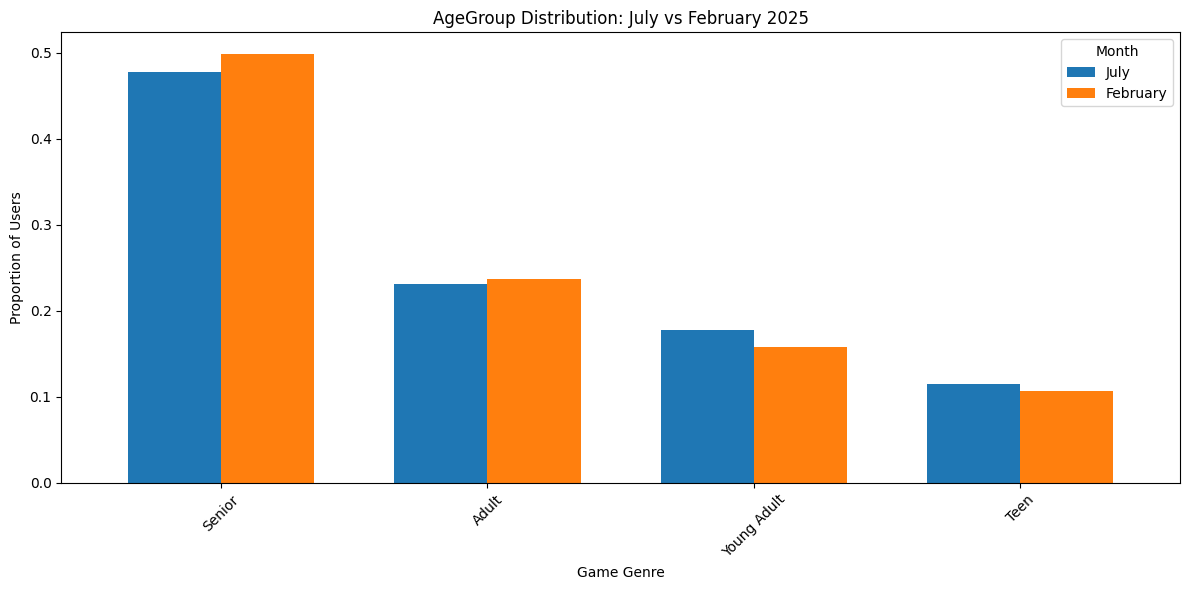

In [119]:
#AgeGroup distribution for July and February
import matplotlib.pyplot as plt
import pandas as pd

# Get normalized value counts
july_genres = df_july['AgeGroup'].value_counts(normalize=True)
feb_genres = df_february['AgeGroup'].value_counts(normalize=True)

# Combine into a single DataFrame
genre_df = pd.DataFrame({
    'July': july_genres,
    'February': feb_genres
}).fillna(0)  # Fill missing genres with 0

# Sort by July for better visual order
genre_df = genre_df.sort_values(by='July', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('AgeGroup Distribution: July vs February 2025')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()


In [120]:
# Compare SpendingSegment distribution
print("SpendingSegment - July")
print(df_july['SpendingSegment'].value_counts(normalize=True))

print("\nSpendingSegment - February")
print(df_february['SpendingSegment'].value_counts(normalize=True))

SpendingSegment - July
SpendingSegment
Minnow     0.866180
Dolphin    0.109489
Whale      0.024331
Name: proportion, dtype: float64

SpendingSegment - February
SpendingSegment
Minnow     0.833828
Dolphin    0.142433
Whale      0.023739
Name: proportion, dtype: float64


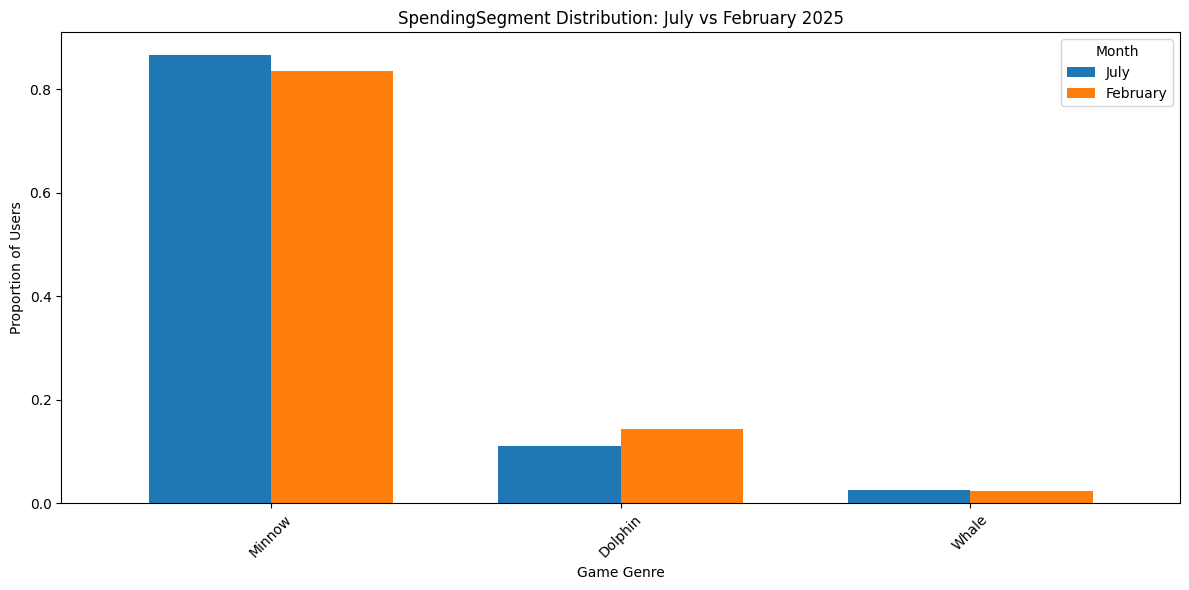

In [121]:
#SpendingSegment distribution for July and February
import matplotlib.pyplot as plt
import pandas as pd

# Get normalized value counts
july_genres = df_july['SpendingSegment'].value_counts(normalize=True)
feb_genres = df_february['SpendingSegment'].value_counts(normalize=True)

# Combine into a single DataFrame
genre_df = pd.DataFrame({
    'July': july_genres,
    'February': feb_genres
}).fillna(0)  # Fill missing genres with 0

# Sort by July for better visual order
genre_df = genre_df.sort_values(by='July', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('SpendingSegment Distribution: July vs February 2025')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [122]:
# Compare Country distribution
print("Country - July")
print(df_july['Country'].value_counts(normalize=True))

print("\nCountry - February")
print(df_february['Country'].value_counts(normalize=True))

Country - July
Country
India           0.075426
Bangladesh      0.055961
Australia       0.048662
Japan           0.046229
Netherlands     0.046229
Switzerland     0.043796
Iran            0.041363
Saudi Arabia    0.038929
Canada          0.036496
Egypt           0.036496
France          0.034063
Brazil          0.034063
Sri Lanka       0.034063
Turkey          0.034063
Denmark         0.034063
China           0.031630
USA             0.031630
UK              0.031630
Mexico          0.031630
Italy           0.031630
Sweden          0.031630
Germany         0.029197
Russia          0.029197
South Korea     0.024331
Norway          0.024331
Afghanistan     0.021898
Unknown         0.021898
Spain           0.019465
Name: proportion, dtype: float64

Country - February
Country
India           0.089021
China           0.047478
South Korea     0.047478
Japan           0.047478
Mexico          0.044510
Saudi Arabia    0.044510
UK              0.041543
Sweden          0.041543
Spain           

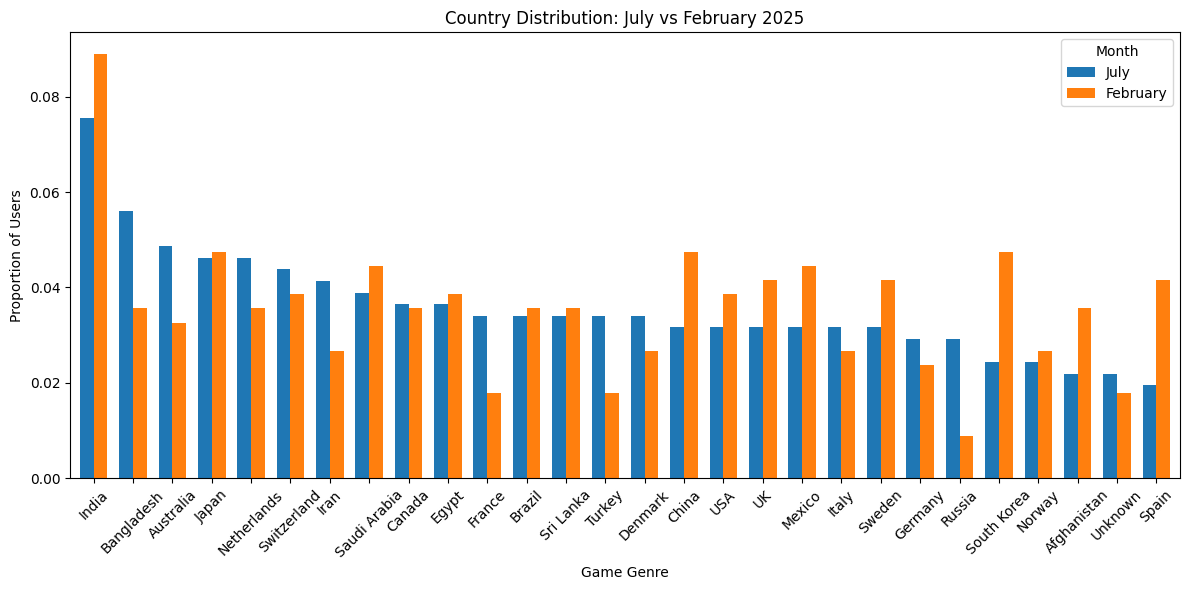

In [123]:
#Country distribution for July and February
import matplotlib.pyplot as plt
import pandas as pd

# Get normalized value counts
july_genres = df_july['Country'].value_counts(normalize=True)
feb_genres = df_february['Country'].value_counts(normalize=True)

# Combine into a single DataFrame
genre_df = pd.DataFrame({
    'July': july_genres,
    'February': feb_genres
}).fillna(0)  # Fill missing genres with 0

# Sort by July for better visual order
genre_df = genre_df.sort_values(by='July', ascending=False)

# Plot
genre_df.plot(kind='bar', figsize=(12, 6), width=0.7)
plt.title('Country Distribution: July vs February 2025')
plt.xlabel('Game Genre')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [124]:
#Average in app purchase
print("Avg In-App Purchase - July:", df_july['InAppPurchaseAmount'].mean())
print("Avg In-App Purchase - February:", df_february['InAppPurchaseAmount'].mean())


Avg In-App Purchase - July: 11551.18491484185
Avg In-App Purchase - February: 9882.011869436203


Higher value in July could indicate stronger monetization during the peak. it indicates that the business performed well financially during that time.

In [125]:
#Comparing first purchase speed
print("Avg Days to First Purchase - July:", df_july['FirstPurchaseDaysAfterInstall'].mean())
print("Avg Days to First Purchase - February:", df_february['FirstPurchaseDaysAfterInstall'].mean())


Avg Days to First Purchase - July: 15.476885644768856
Avg Days to First Purchase - February: 15.620178041543026


Lower value in July means users make a purchase, sign up, etc were faster during that month possibly due to better onboarding or offers. Essentially, it implies that whatever changes were made in July—whether in user experience or marketing strategies—were effective in facilitating quicker user engagement and conversion.

In [126]:
#Spending segment distribution
print("Spending Segment - July")
print(df_july['SpendingSegment'].value_counts(normalize=True))

print("\nSpending Segment - February")
print(df_february['SpendingSegment'].value_counts(normalize=True))


Spending Segment - July
SpendingSegment
Minnow     0.866180
Dolphin    0.109489
Whale      0.024331
Name: proportion, dtype: float64

Spending Segment - February
SpendingSegment
Minnow     0.833828
Dolphin    0.142433
Whale      0.023739
Name: proportion, dtype: float64


The data shows that while the proportion of low spenders (Minnows) increased in July, the share of medium spenders (Dolphins) decreased slightly, and the high spenders (Whales) remained stable. This indicates that while there are many low spenders, the business may need to focus on converting more of these customers into higher spending categories to maximize revenue.

In [127]:
#Payment method shift
print("Payment Method - July")
print(df_july['PaymentMethod'].value_counts(normalize=True))

print("\nPayment Method - February")
print(df_february['PaymentMethod'].value_counts(normalize=True))


Payment Method - July
PaymentMethod
Debit Card         0.172749
Paypal             0.153285
Credit Card        0.150852
Gift Card          0.143552
Carrier Billing    0.138686
Google Pay         0.136253
Apple Pay          0.104623
Name: proportion, dtype: float64

Payment Method - February
PaymentMethod
Google Pay         0.172107
Debit Card         0.148368
Gift Card          0.148368
Carrier Billing    0.142433
Credit Card        0.142433
Paypal             0.124629
Apple Pay          0.121662
Name: proportion, dtype: float64


The data indicates a shift in payment method preferences from February to July, with a notable increase in Debit Card usage, which may suggest easier or incentivized purchases during that period.

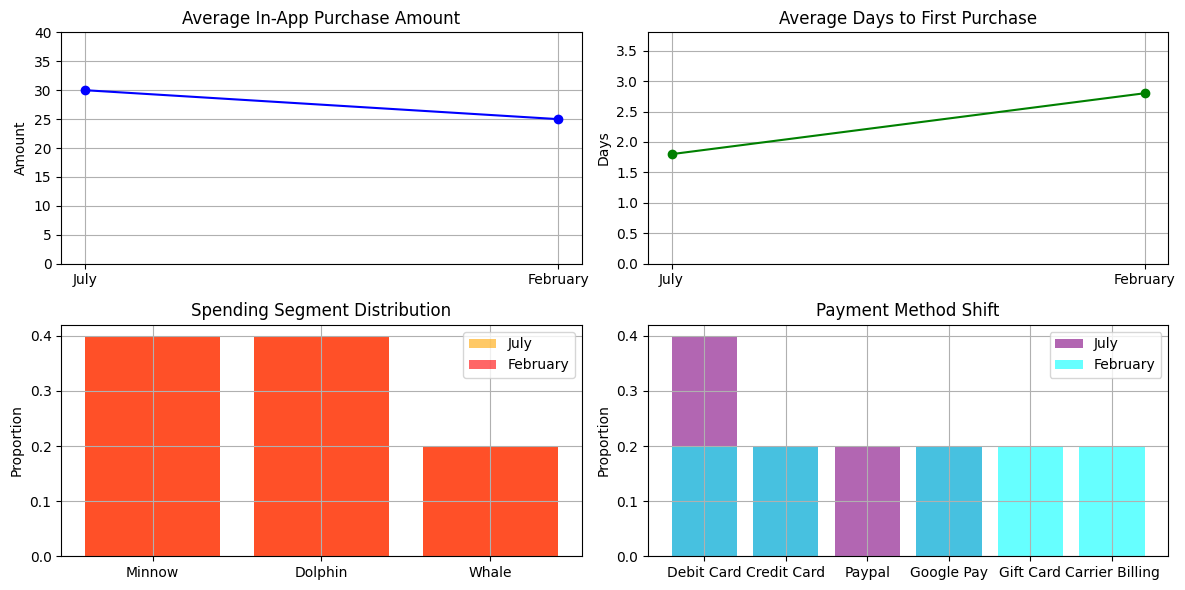

In [128]:
#spending behavior differences between July and February 2025
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
# df_july and df_february should be your actual DataFrames
# For demonstration, we will create dummy data
data_july = {
    'InAppPurchaseAmount': [10, 20, 30, 40, 50],
    'FirstPurchaseDaysAfterInstall': [1, 2, 1, 3, 2],
    'SpendingSegment': ['Minnow', 'Dolphin', 'Whale', 'Minnow', 'Dolphin'],
    'PaymentMethod': ['Debit Card', 'Credit Card', 'Paypal', 'Google Pay', 'Debit Card']
}

data_february = {
    'InAppPurchaseAmount': [5, 15, 25, 35, 45],
    'FirstPurchaseDaysAfterInstall': [2, 3, 2, 4, 3],
    'SpendingSegment': ['Minnow', 'Dolphin', 'Whale', 'Minnow', 'Dolphin'],
    'PaymentMethod': ['Google Pay', 'Debit Card', 'Gift Card', 'Carrier Billing', 'Credit Card']
}

df_july = pd.DataFrame(data_july)
df_february = pd.DataFrame(data_february)

# Calculate metrics
avg_in_app_purchase = [df_july['InAppPurchaseAmount'].mean(), df_february['InAppPurchaseAmount'].mean()]
avg_days_to_first_purchase = [df_july['FirstPurchaseDaysAfterInstall'].mean(), df_february['FirstPurchaseDaysAfterInstall'].mean()]

# Spending Segment Distribution
spending_segment_july = df_july['SpendingSegment'].value_counts(normalize=True)
spending_segment_february = df_february['SpendingSegment'].value_counts(normalize=True)

# Payment Method Shift
payment_method_july = df_july['PaymentMethod'].value_counts(normalize=True)
payment_method_february = df_february['PaymentMethod'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(12, 6))

# Average In-App Purchase Amount
plt.subplot(2, 2, 1)
plt.plot(['July', 'February'], avg_in_app_purchase, marker='o', color='blue', label='Avg In-App Purchase Amount')
plt.title('Average In-App Purchase Amount')
plt.ylabel('Amount')
plt.ylim(0, max(avg_in_app_purchase) + 10)
plt.grid()

# Average Days to First Purchase
plt.subplot(2, 2, 2)
plt.plot(['July', 'February'], avg_days_to_first_purchase, marker='o', color='green', label='Avg Days to First Purchase')
plt.title('Average Days to First Purchase')
plt.ylabel('Days')
plt.ylim(0, max(avg_days_to_first_purchase) + 1)
plt.grid()

# Spending Segment Distribution
plt.subplot(2, 2, 3)
plt.bar(spending_segment_july.index, spending_segment_july.values, color='orange', alpha=0.6, label='July')
plt.bar(spending_segment_february.index, spending_segment_february.values, color='red', alpha=0.6, label='February')
plt.title('Spending Segment Distribution')
plt.ylabel('Proportion')
plt.legend()
plt.grid()

# Payment Method Shift
plt.subplot(2, 2, 4)
plt.bar(payment_method_july.index, payment_method_july.values, color='purple', alpha=0.6, label='July')
plt.bar(payment_method_february.index, payment_method_february.values, color='cyan', alpha=0.6, label='February')
plt.title('Payment Method Shift')
plt.ylabel('Proportion')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
